In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [10]:
#Get column names using inspector
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
#Get a list of column name and types and find date
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
#Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [ ]:
##### #Query single record in the db, use a for loop
rows = engine.execute("SELECT * FROM hawaii WHERE  ")
    for row in rows:
    print(row)


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# year_ago = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", last_date)






Query Date:  2016-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores
precipt_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
filter(Measurement.date <= "2017-08-23").all()

In [23]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipt_df = pd.DataFrame(precipt_data, columns = ["date", "prcp"])
precipt_df["date"] = pd.to_datetime(precipt_df["date"])
precipt_df = precipt_df.sort_values("date").dropna().set_index("date")


In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipt_df.describe()



,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# # Sort the dataframe by date
# sorted_precipt_df = precipt_df.sort_values(by="date")
# sorted_precipt_df.head()

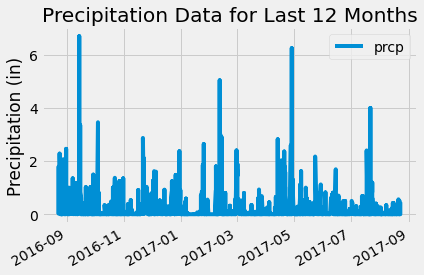

In [30]:
# Use Pandas Plotting with Matplotlib to plot the data
precipt_df.plot()
plt.title("Precipitation Data for Last 12 Months")
plt.ylabel("Precipitation (in)")
plt.xlabel("")
plt.savefig("Images/Precipitation Data.png")

# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number stations in the dataset
station_total  = session.query(Station.id).count()
print(f"There are {station_total} stations in this dataset. ")

There are 9 stations in this dataset. 


In [40]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.id).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [60]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#lowest
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs), 
              func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [62]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_temp_data = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date > last_date).all()
active_temp_data[:5]

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0)]

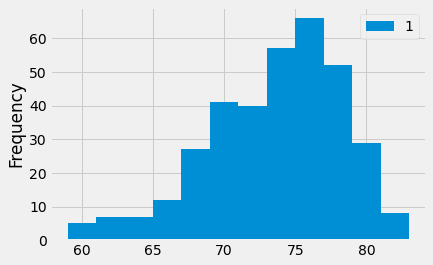

In [64]:
#Plot the results as a histogram with bins=12.
active_temp_data_df = pd.DataFrame(active_temp_data)
active_temp_data_df.plot(kind="hist", bins=12);
plt.savefig("Images/Active Station Hist.png")

# Close session

In [ ]:
# Close Session
session.close()